# Imports

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split

**Loading Data**

In [ ]:
vp = pd.read_csv('/content/vp.csv')
vp.head()

,Name,Roll No.,Math1,Physics1,EE,CO,ED,FEC1,SGPGA1,Math2,Physics2,Chem,BME,Workshop,FEC2,SGPGA2
0,1 VASU GUPTA,2017/B1/67,7,6,7,7,6,5,9.5,7,7,7,7,7,5,9.8
1,2 TANISH GROVER,2017/B1/68,7,7,7,7,5,3,9.4,6,7,7,6,4,6,9.2
2,3 DHANANJAY NEGI,2017/B1/69,6,5,3,6,4,3,7.7,4,6,5,4,6,4,7.8
3,4 AMIT KUMAR SINGH,2017/B1/70,5,7,7,5,4,3,8.5,7,7,7,7,7,5,9.8
4,5 RITIK AGGARWAL,2017/B1/71,6,7,7,5,5,3,8.8,7,6,7,7,6,5,9.5


**Functions to be used** : **plot_graphs** : used to plot graphs for epochs vs loss, 
                            **NNpredict** : used to create and train a neural 4 layered neural network(64,32,16,1 nodes respectively),
                            **to_arr** :used to convert grades into array with numbers
                            

In [ ]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
def NNpredict(X_train,X_test,y_train,y_test):
  model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, input_shape = [6], activation = 'relu'),
                            tf.keras.layers.Dense(32, activation = 'relu'),
                            tf.keras.layers.Dense(16, activation = 'relu'),
                            tf.keras.layers.Dense(1)])
  opt = tf.keras.optimizers.Adam(0.001)
  model.compile(loss = 'mse', optimizer = opt)
  history = model.fit(X_train,y_train, batch_size=X_train.shape[0],epochs=300, 
                    #callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
                    validation_data=(X_test,y_test))
  return model, history, sklearn.metrics.r2_score(y_test,model.predict(X_test))
def to_arr(stri):
  grade2idx = {'F':0,'P':1,'C':2,'B':3,'B+':4,'A':5,'A+':6,'O':7}
  temp = stri.split(' ')
  temp = [grade2idx[i] for i in temp]
  return np.array(temp)  

### Model for sem1 B batch

In [ ]:
X=vp[['Math1', 'Physics1', 'EE', 'CO', 'ED', 'FEC1']] # taking the semester 1 subjects for B batch from our dataset
#Y = Final[['Math2', 'Physics2', 'Chem', 'BME', 'Workshop', 'FEC2']] this will be our predicted subjects
Y=vp['SGPGA2']
#X = X/28
# converting everything into array and splitting our data into train and test sets
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X,Y,test_size=0.3,random_state=101)
X_trainB = np.array(X_trainB)
X_testB = np.array(X_testB)
y_trainB = np.array(y_trainB)
y_testB = np.array(y_testB)

### Neural Network

Epoch 1/300
1/1 [==============================] - 0s 86ms/step - loss: 54.6519 - val_loss: 50.0554
Epoch 2/300
1/1 [==============================] - 0s 30ms/step - loss: 49.3107 - val_loss: 44.8371
Epoch 3/300
1/1 [==============================] - 0s 30ms/step - loss: 44.2498 - val_loss: 39.9789
Epoch 4/300
1/1 [==============================] - 0s 35ms/step - loss: 39.5307 - val_loss: 35.5589
Epoch 5/300
1/1 [==============================] - 0s 30ms/step - loss: 35.2658 - val_loss: 31.6816
Epoch 6/300
1/1 [==============================] - 0s 29ms/step - loss: 31.5522 - val_loss: 28.4428
Epoch 7/300
1/1 [==============================] - 0s 29ms/step - loss: 28.4427 - val_loss: 25.7936
Epoch 8/300
1/1 [==============================] - 0s 33ms/step - loss: 25.8690 - val_loss: 23.5093
Epoch 9/300
1/1 [==============================] - 0s 33ms/step - loss: 23.6271 - val_loss: 21.4093
Epoch 10/300
1/1 [==============================] - 0s 36ms/step - loss: 21.5442 - val_loss: 19.3704

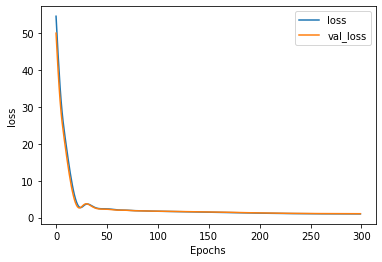

0.4407309880348562


In [ ]:
m,h,r = NNpredict(X_trainB,X_testB,y_trainB,y_testB) # training neural network
plot_graphs(h,'loss') # plotting loss function
print(r) # printing r2 accuracy

**Randmom Forest Regressor**

In [ ]:
RFmodel = RandomForestRegressor(n_estimators=900) 
RFmodel.fit(X_trainB,y_trainB)
predict = RFmodel.predict(X_testB) # training random forest regressor
sklearn.metrics.r2_score(y_testB,RFmodel.predict(X_testB)) # r2 score of random forest regressor
### finding out that random forest worked better than neural network ###

0.6201982923660673

## Model for sem1A batch

In [ ]:
## now we have to do sem 1 b batch separately because of difference in subjects ##
X=vp[['Math1', 'Physics1', 'Chem', 'BME', 'Workshop', 'FEC1']] # taking the semester 1 subjects for A batch from our dataset
#Y = Final[['Math2', 'Physics2', 'Chem', 'BME', 'Workshop', 'FEC2']]
Y=vp['SGPGA2']
# converting everything to arrays and splitting our data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.3,random_state=101)
X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)

**Neural Network**

Epoch 1/300
1/1 [==============================] - 0s 83ms/step - loss: 54.0885 - val_loss: 51.3757
Epoch 2/300
1/1 [==============================] - 0s 30ms/step - loss: 50.8230 - val_loss: 48.3083
Epoch 3/300
1/1 [==============================] - 0s 30ms/step - loss: 47.7506 - val_loss: 45.3975
Epoch 4/300
1/1 [==============================] - 0s 30ms/step - loss: 44.8544 - val_loss: 42.6123
Epoch 5/300
1/1 [==============================] - 0s 33ms/step - loss: 42.0919 - val_loss: 39.9412
Epoch 6/300
1/1 [==============================] - 0s 31ms/step - loss: 39.4462 - val_loss: 37.3660
Epoch 7/300
1/1 [==============================] - 0s 31ms/step - loss: 36.9011 - val_loss: 34.8703
Epoch 8/300
1/1 [==============================] - 0s 30ms/step - loss: 34.4344 - val_loss: 32.4423
Epoch 9/300
1/1 [==============================] - 0s 33ms/step - loss: 32.0334 - val_loss: 30.0715
Epoch 10/300
1/1 [==============================] - 0s 32ms/step - loss: 29.6910 - val_loss: 27.7536

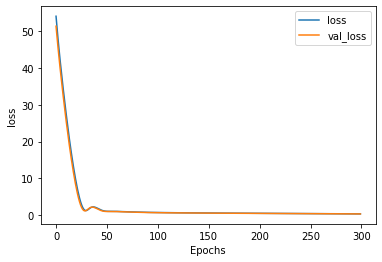

0.8293612941756132


In [ ]:
m,h,r = NNpredict(X_train2,X_test2,y_train2,y_test2) # training neural network
plot_graphs(h,'loss') #plotting loss graph
print(r) # prining r2 score

**Random Forest**

In [ ]:
RFmodel = RandomForestRegressor(n_estimators=900)
RFmodel.fit(X_train2,y_train2) # making random forest regressor
predict = RFmodel.predict(X_test2) 
sklearn.metrics.r2_score(y_test2,RFmodel.predict(X_test2)) # r2 score for random forest regressor

0.8881161838243156

**Using our models to make a Custom Prediction**

In [ ]:
stri = input() # input your custom grades 
arr = to_arr(stri)
RFmodel.predict([arr])[0] # making our first custom prediction

B+ B+ A B+ B+ A


7.269444444444513